In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from svmsource import frontiere, rand_gauss, rand_bi_gauss, plot_2d, plot_gallery, title
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from time import time
import pylab as pl
import math
from sklearn.datasets import fetch_lfw_people

# Question 1-4
## 1)

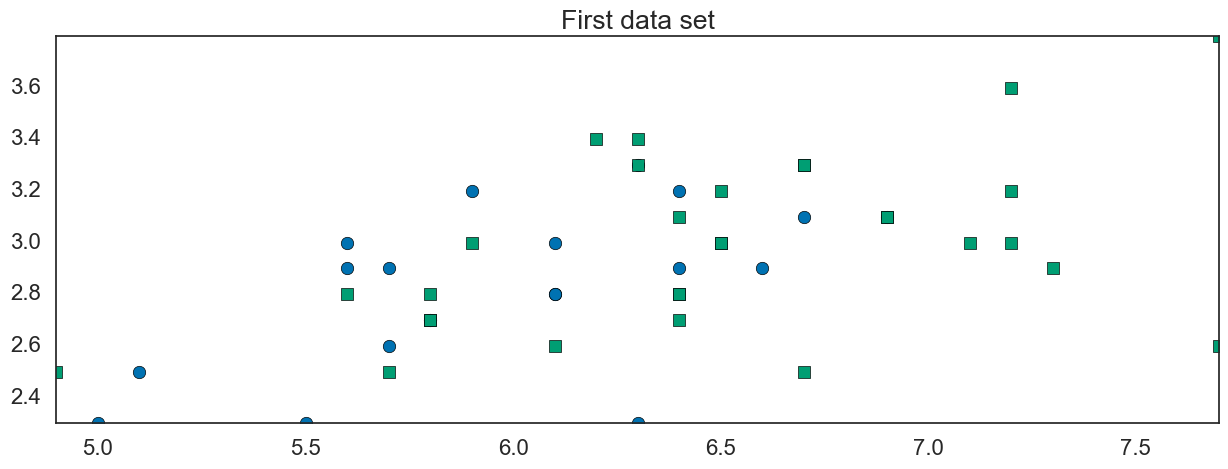

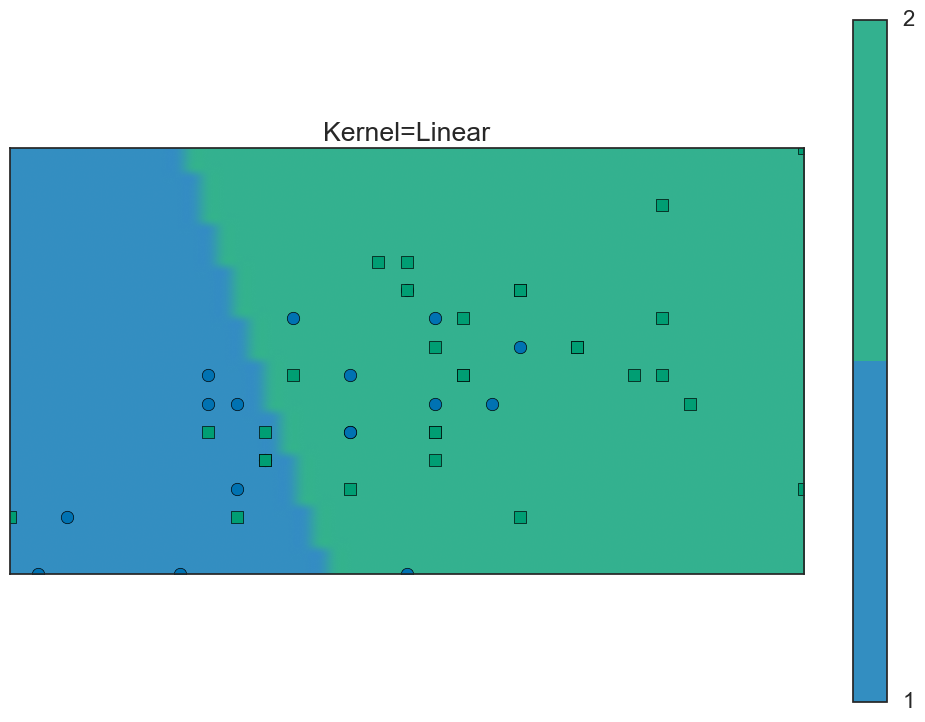

The score with the linear kernel is 0.7


In [42]:
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
# text.usetex is set as False by default to avoid problems with student computers
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()
###############################################################################
#               Iris Dataset
###############################################################################


iris = datasets.load_iris()
X = iris.data
y = iris.target

# split train test
X = X[y != 0, :2]
y = y[y != 0]
size = len(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# fit the model
clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)

# predict labels
score_linear = clf_linear.score(X_test, y_test)

# display your results using plot_2d and frontiere
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.title('First data set')
plot_2d(X_train, y_train)
plt.show()
def f1(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_linear.predict(xx.reshape(1, -1))

plt.figure(2)
plt.title('Kernel=Linear')
frontiere(f1, X_train, y_train, w=None, step=50, alpha_choice=1)
plt.show()
print ('The score with the linear kernel is %s' %score_linear)

## 2)

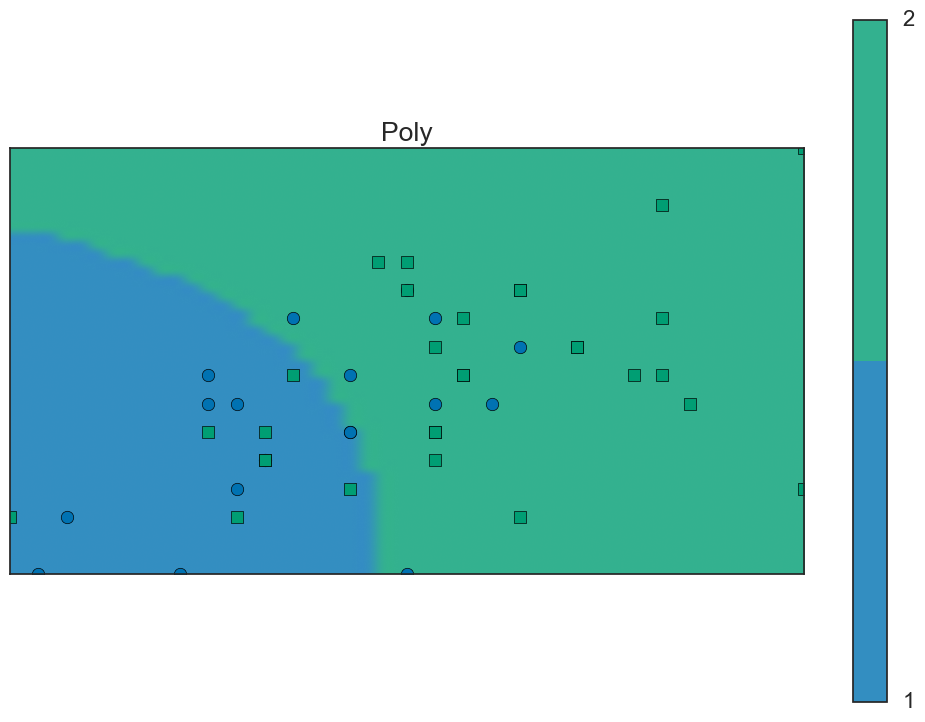

The score with the poly kernel is 0.76


In [43]:
# fit the model
clf_poly = SVC(kernel='poly')
clf_poly.fit(X_train, y_train)

# predict labels
score_poly = clf_poly.score(X_test, y_test)

# display frontiere
def f2(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_poly.predict(xx.reshape(1, -1))

plt.figure(3)
plt.title('Poly')
frontiere(f2, X_train, y_train, w=None, step=50, alpha_choice=1)
plt.show()
print ('The score with the poly kernel is %s' %score_poly)

### Reponse
Le résultat avec un SVM basé sur noyau linéaire est 0.7.<br/>
Le résultat avec un SVM basé sur noyau polynomial est 0.76.<br/>
Apparemment, le résultat polynomial est mieux que le résultat linéaire.<br/>

## 3)
Le problème primal est:
<br><br>
\begin{cases}
\underset{W\in\mathcal{H},\mathcal{w}_0\in\mathbb{R},\xi\in\mathbb{R}^n}{\operatorname{arg\,min}}(\frac{1}{2}\|{w}\|^2+C\sum^n_{i=1}\xi_i)\\
s.c\quad \xi_i\ge0,&\forall i\in\{1,...,n\}\\
\quad\quad y_i(<w,\Phi(X_i)>+w_0)\ge1-\xi_i,&\forall i\in\{1,...,n\}
\end{cases}
<br>
On peut calculer $\xi_i$ dans une autre perspective. Pour un point$(x_i, y_i)$, s'il viole la frontière, puis $\xi_i$ enregistre sa distance à la frontière. Sinon, $\xi_i$ est 0. C'est à dire:<br/>
$$\xi_i = margin\,violation = max(1-y_n(w^Tz_n+\mathcal{w_0}),\,0)$$
<br>
Donc, on peut réécrire le problème primal de la façon suivante:
$$\underset{W\in\mathcal{H},\mathcal{w}_0\in\mathbb{R}}{\operatorname{arg\,min}}(\frac{1}{2}\|{w}\|^2+C\sum^n_{i=1}[1-y_i(<w,\Phi(X_i)>+\mathcal{w}_0)]_{+})$$

## 4)
On définit la fonction qui vaut 1 quand la marge est négative et 0 sinon:
<br><br>
$$\mathcal{l}_{0/1}(z)=\mathbb{1}\{z<0\}$$
$$z=y_i(<w,\Phi(X_i)>+w_0)-1$$
<br>
Il faut réduire les samples qui viole la frontière, donc:
<br>
$$\underset{W\in\mathcal{H},\mathcal{w}_0\in\mathbb{R}}{\operatorname{arg\,min}}(\frac{1}{2}\|{w}\|^2+C\sum^n_{i=1}l_{0/1}(y_i(<w,\Phi(X_i)>+\mathcal{w}_0)-1))$$
<br>
Cependant, $l_{0/1}$ n'est pas convexe et continue. Donc il faut le changer pour rendre la résolution plus facile. On utilise la fonction $\mathcal{Hinge}$:
<br>
$$l_{hinge}(z)=max(0, 1-z)$$
<br>
La fonction $\mathcal{Hinge}$ est un majorant convexe et continu de $l_{0/1}$. Et il peut aider le SVM à minimiser l'erreur de classification.

# SVM GUI
### Reponse
To do
# Classification de visages

n_samples = 1288
h = 100
w = 100
n_colors = 3
Fitting the classifier to the training set
Predicting the people names on the testing set
done in 0.225s
Chance level : 0.621052631579
size of X_test 190
size of y_test 190
Accuracy : 0.878947368421


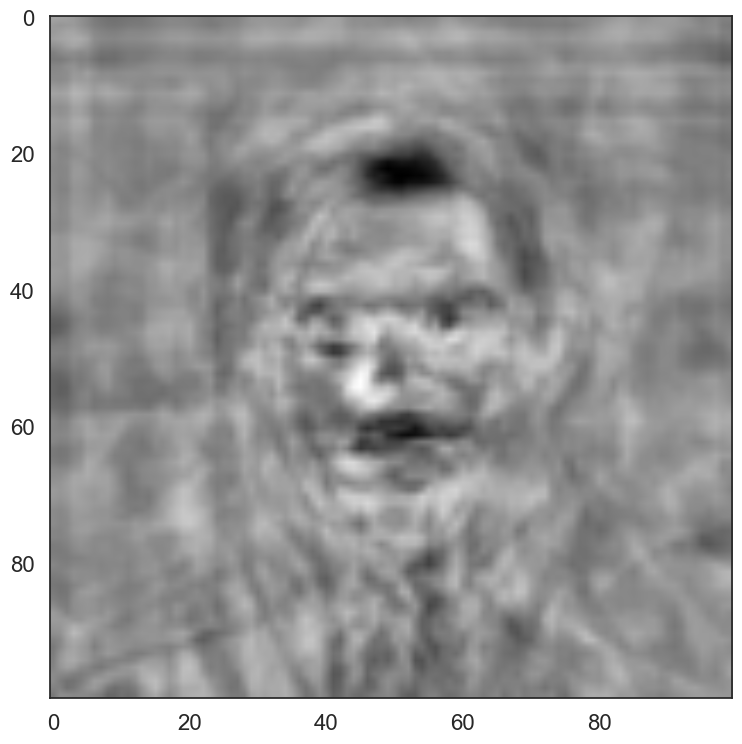

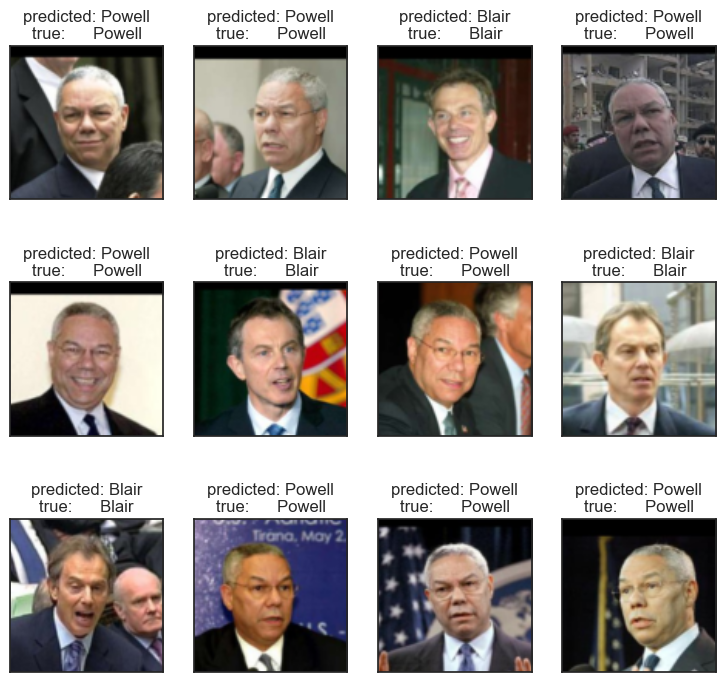

In [44]:
####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape
print 'n_samples = %s' %n_samples
print 'h = %s' %h
print 'w = %s' %w
print 'n_colors = %s' %n_colors
# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()
####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0] / 2], indices[X.shape[0] / 2:]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[
    train_idx, :, :, :], images[test_idx, :, :, :]

####################################################################
# Quantitative evaluation of the model quality on the test set
print "Fitting the classifier to the training set"
t0 = time()


#TODO : fit a classifier, 
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)


print "Predicting the people names on the testing set"
t0 = time()

# TODO : predict labels for the X_test images
y_pred = clf.predict(X_test)

print "done in %0.3fs" % (time() - t0)
print "Chance level : %s" % max(np.mean(y), 1. - np.mean(y))
print 'size of X_test %s' %len(X_test)
print 'size of y_test %s' %len(y_test)
print "Accuracy : %s" % clf.score(X_test, y_test)
####################################################################
# Look at the coefficients
pl.figure()
pl.imshow(np.reshape(clf.coef_, (h, w)))

####################################################################
# Qualitative evaluation of the predictions using matplotlib


prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()


## 5)

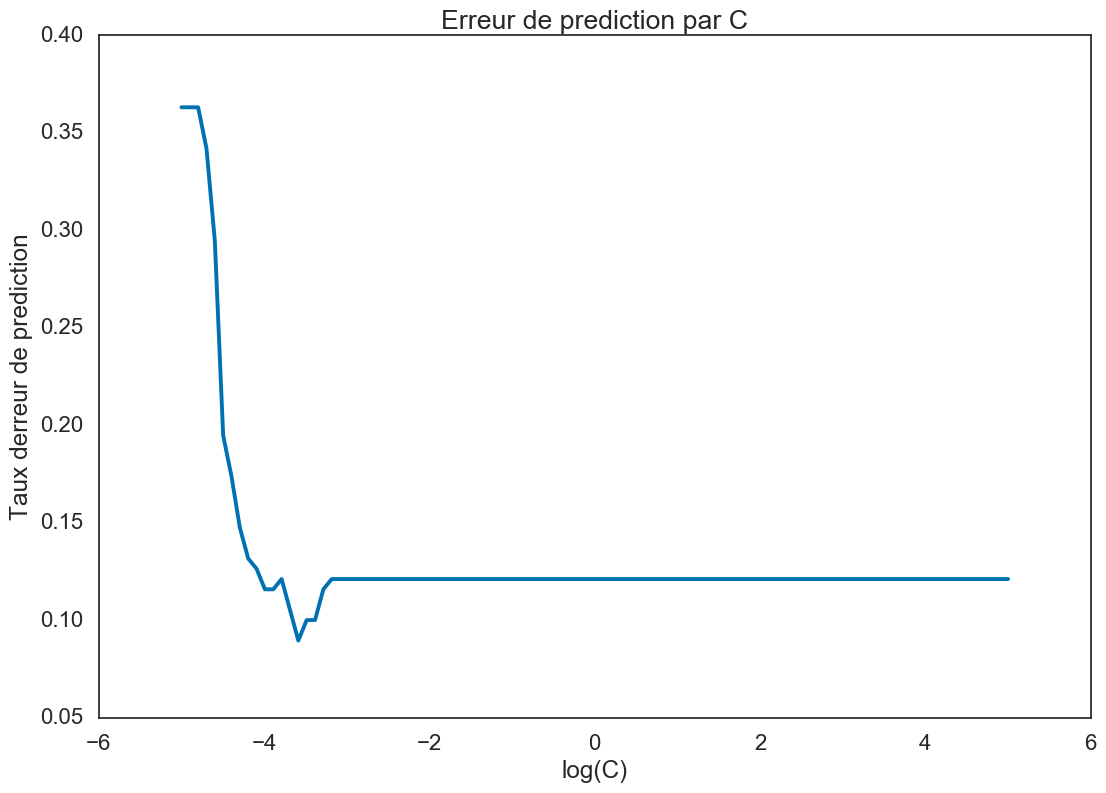

In [45]:
#QUESTION 5 : TODO : try various values for C in the SVC function and plot the error curve
def errPreDeC(c):
    errPre = []
    for i in c:
        clf = SVC(C=math.pow(10,i), kernel='linear')
        clf.fit(X_train, y_train)
        errPre.append(1 - clf.score(X_test, y_test))
    plt.figure()
    plt.plot(c, errPre)
    plt.title('Erreur de prediction par C')
    plt.xlabel('log(C)')
    plt.ylabel('Taux derreur de prediction')
    plt.show()
C = np.linspace(-5.0,5.0, 100)
errPreDeC(C)

### Reponse
C est un hyperparamètre qui contrôle le compromis entre la complexité du modèle et le nombre d'erreurs de classification du modèle.

En principe, C peut sélectionner tous les nombres supérieurs à 0, au besoin. Lorsque le C est plus grand, on fait plus d'attention à réduire l'erreur totale $\sum_{i=1}^{n}\xi_i$ dans le processus d'optimisation globale, même la réduction de l'intervalle.

#### 1) Poor-fitting
Lorsque C tend vers zéro, nous ne sommes plus préoccupés de savoir si la classification est correcte,, alors nous ne serons pas en mesure d'obtenir des solutions significatives et l'algorithme ne converge pas.


#### 2) Over-fitting
Lorsque C tend vers l'infini, le problème est que les échantillons qui ne permettent pas des erreurs existent de classification. C'est un problème de ''hard-margin''.

Normalement, lorsque la valeur de C est plus grand, la performance de l'ensemble de la formation est meilleure, mais l'écart est réduit la tolérance pour le bruit d'interférence est réduite, il peut conduire à surapprentissage (over-fitting).

Pour cette question, selon la graphe, on peut voir que lorsque $\log(c)$ est entre (-4, -3), la prediction est la plus précise. Après, à cause de le problem ''over-fitting'', la performance chute un peu.

## 6)

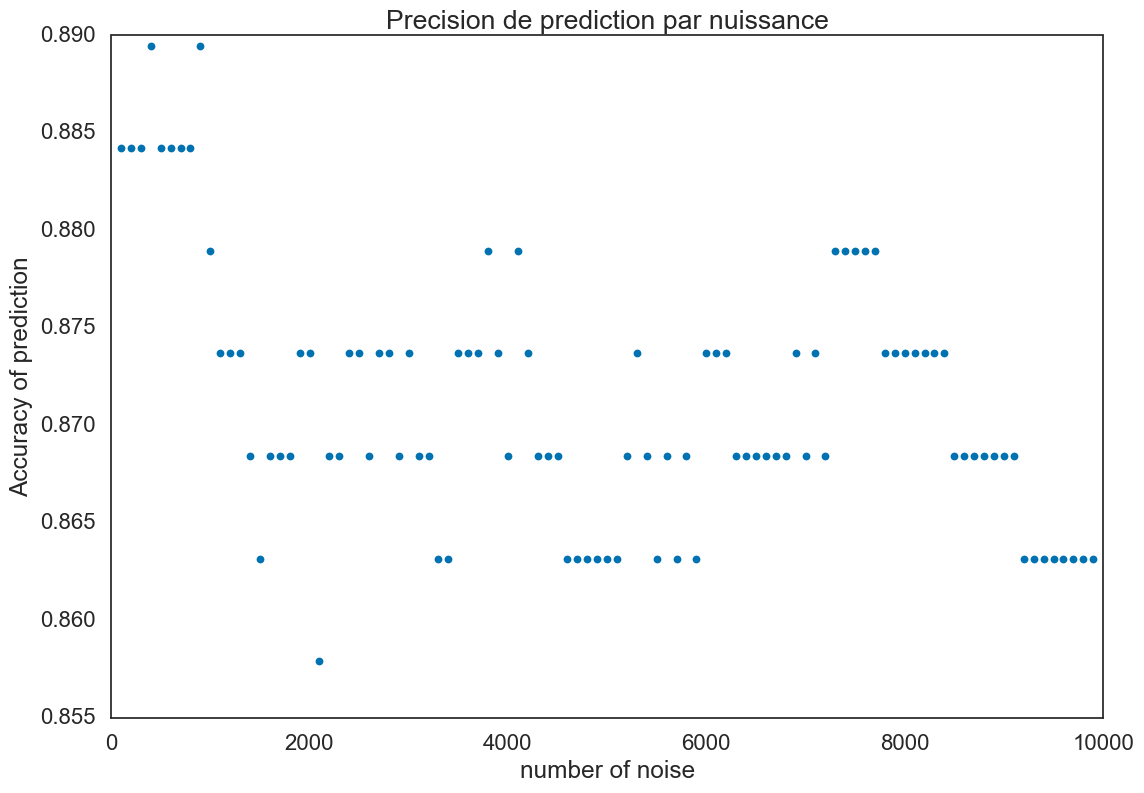

In [51]:
noise_train = np.random.normal(0, 1, (X_train.shape[0], 10000))
noise_test = np.random.normal(0, 1, (X_test.shape[0], 10000))
n_noise = range(100, 10000, 100)
Accuracy = []
for i in n_noise:
    X_train_noise = np.hstack([X_train, noise_train[:, :i]])
    X_test_noise = np.hstack([X_test, noise_test[:, :i]])
    clf = SVC(kernel='linear')
    clf.fit(X_train_noise, y_train)
    Accuracy.append(clf.score(X_test_noise, y_test))
    
plt.figure()
plt.plot(n_noise, Accuracy, '.')
plt.title('Precision de prediction par nuissance')
plt.xlabel('number of noise')
plt.ylabel('Accuracy of prediction')
plt.show()

## 7)
### Reponse

## 8.1)

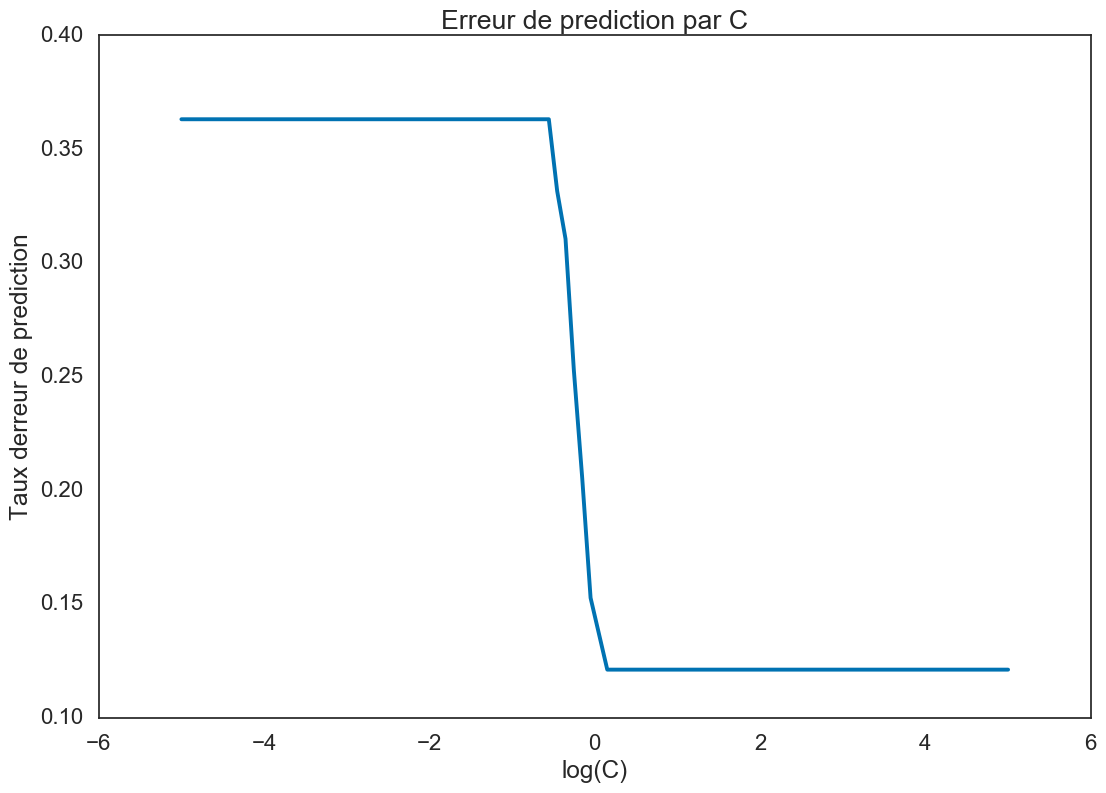

In [52]:
#QUESTION 8.1: TODO : try various values for C in the SVC function and plot the error curve
def errPreDeCRBF(c):
    errPre = []
    for i in c:
        clf = SVC(C=math.pow(10,i), kernel='rbf')
        clf.fit(X_train, y_train)
        errPre.append(1 - clf.score(X_test, y_test))
    plt.figure()
    plt.plot(c, errPre)
    plt.title('Erreur de prediction par C')
    plt.xlabel('log(C)')
    plt.ylabel('Taux derreur de prediction')
    plt.show()
C = np.linspace(-5.0,5.0, 100)
errPreDeCRBF(C)

### Reponse
On affiche la change d'erreur de prediction par $\log(C)$ d'un noyau 'RBF'. 

Par raport à la graphe d'un noyau linénaire, Lorsque $\log(C)$ est plus grand que 0, la performance est la meillere. De plus, il ne chute pas, c'est à dire le noyau 'RBF' peut moins sensible au problème 'Over-fitting'

## 8.2)

Fitting the classifier to the training set


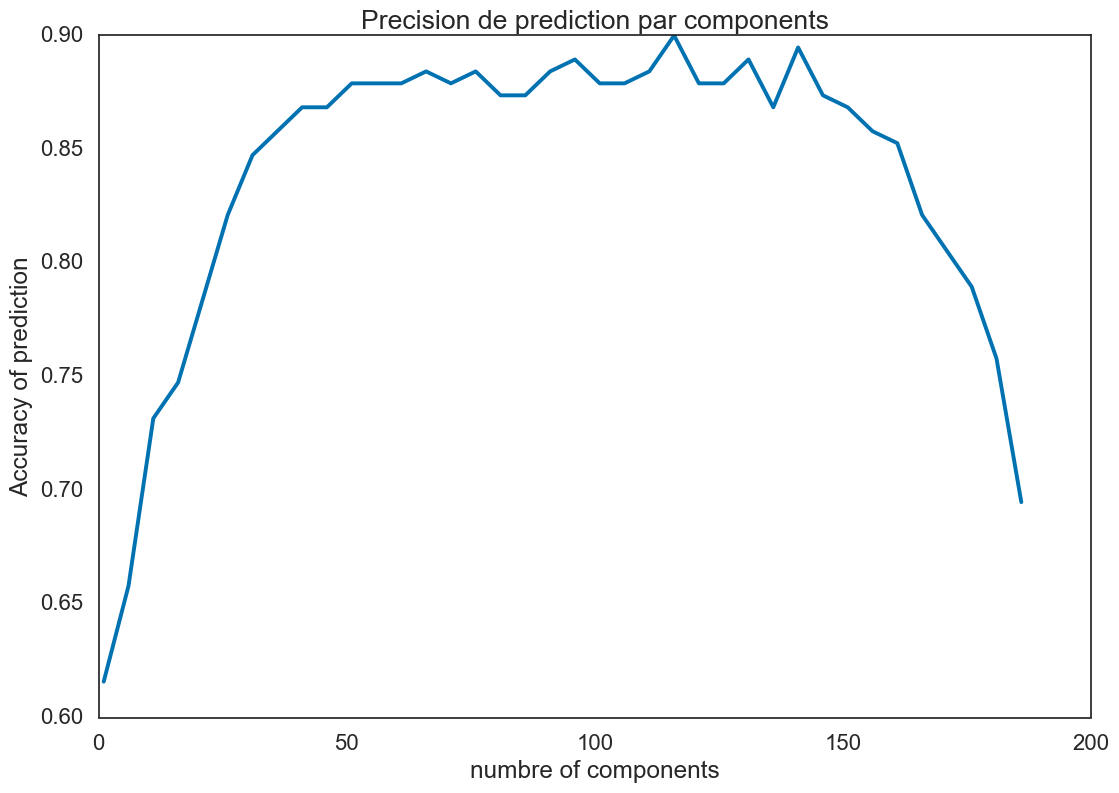

Predicting the people names on the testing set


In [47]:
####################################################################
# Quantitative evaluation of the model quality on the test set
print "Fitting the classifier to the training set"
t0 = time()
components = range(1, 190, 5)
Accuracy = []
for i in components:
    #TODO : fit a classifier, 
    pca = PCA(svd_solver='randomized', n_components=i, whiten=True)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf = SVC(kernel='rbf')
    clf.fit(X_train_pca, y_train)
    #TODO : predict labels for the X_test images
#     y_pred = clf.predict(X_test_pca)
    Accuracy.append(clf.score(X_test_pca, y_test))
    
plt.figure()
plt.plot(components, Accuracy)
plt.title('Precision de prediction par components')
plt.xlabel('numbre of components')
plt.ylabel('Accuracy of prediction')
plt.show()
print "Predicting the people names on the testing set"
t0 = time()
# print "done in %0.3fs" % (time() - t0)
# print "Accuracy : %s" % clf.score(X_test_pca, y_test)

In [48]:
import numpy as np
print range(1, 10, 3)

[1, 4, 7]
